<h2 align="center">Simulating The Monty Hall Problem with Python<h2>

### Introduction

The Monty Hall problem was first featured on the classic game show "Let's make a Deal". In the final segment of the show, contestants were presented with a choice of three different doors. Behind two of the doors would be a goat, and behind the third would be an extravagant prize such as a car.    

The contestant begins the game by picking one door. The host, Monty Hall, would then open one of the remaining doors. Monty *never* opens the door which contained the car. The door Monty opens always contains a goat. At this point, the contestant was presented with a decision:   

1) Open the originally selected door    
2) Switch to the other unopened door   

In this post, I will examine the theoretical probability of each selection, and then I will use Python to test and prove the theory.

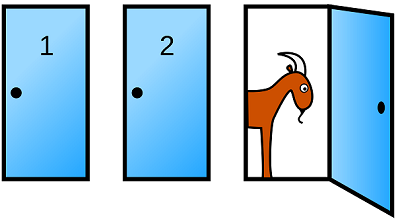

In [48]:
from IPython.display import Image

image_path = '/Users/isabellaw/Desktop/Bayesian Classifiers/images/doors.jpg'
Image(filename=image_path)

### Probability

After Monty opens the door containing a goat, which of these remaining doors presents a better chance of winning the car?   

Before the contestant chooses a door, there is a 1/3 chance they select the door contains a car. After Monty opens a door revealing a goat, there are two doors remaining for a contestant to choose from. One of the two remaining doors contains a car. If this decision is considered in a vacuum, it might appear the contestant has a 50% chance of winning regardless of which door they choose. 

Roopam Upadhyay of ucanalytics.com provides the following probability analysis of Bayes' Theorem as applies to this problem. In his breakdown, it is assumed the contestant has selected Door A.

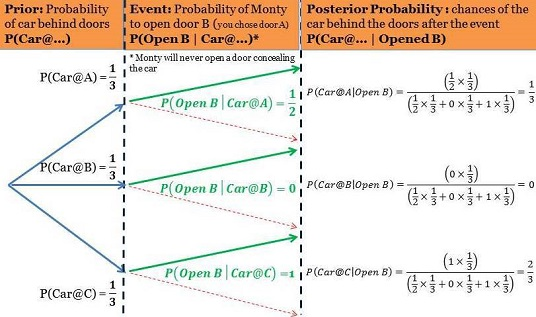

In [49]:
from IPython.display import Image

image_path = '/Users/isabellaw/Desktop/Bayesian Classifiers/images/Monty-Hall-Problem.jpg'
Image(filename=image_path)

Image Source: http://i0.wp.com/ucanalytics.com/blogs/wp-content/uploads/2014/03/Monty-Hall-Problem-1.jpg

As previously discussed, there is a 0% chance Monty will open the door which contains the car. In the probability analysis above, this is represented as P(Open B|Car@B).  This means the probability the car is behind Door C, or P(Open B|Car@C) is 2/3. By choosing to switch, the contestant is betting the car is in one of the two doors they did not originally select (2/3), as opposed to just the initial odds the car is in the originally selected door (1/3).

### Using Python to Determine and Prove Bayes' Theorem

To test Bayes' Theorem on the probability of switching vs. staying, I will use the NumPy (Numerical Python) library to generate random door selections and random door's containing a car.

In [50]:
import numpy as np

In [51]:
x = np.random.random_integers(low=1,high=3,size=(5,2))
x

/var/folders/hx/7vffn02n0t3dzkh46qyw1xjh0000gn/T/ipykernel_22760/2211144307.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 3 + 1) instead
  x = np.random.random_integers(low=1,high=3,size=(5,2))


array([[1, 3],
       [1, 2],
       [3, 3],
       [3, 3],
       [2, 2]])

The previous array provides pairs of random integers. For this analysis, we will assume the first value is the originally selected door, and the second value is the door which contains the car.   

The pair [2,3] represents a scenario in which the contestant has guessed the car is behind Door 2, but the car is actually behind Door 3. We know Monty will never open a door containing a car, so Monty proceeds to open Door 1. If the contestant stays with their original selection (Door 2), they will be sent home with a goat instead of a car.   

If a contestant initially selects the winning door, Monty will choose at random between the other two doors. Both doors contain goats, so the door in which he opens is does not matter. This is the only scenario in which a contestant loses by switching doors.

The following function simulates wins and losses for each of the two options. A win is represented with a 1, and a loss with a 0.

In [52]:
def monty_hall():
    
    [[selected_door, winning_door]] = np.random.random_integers(low=1,high=3,size=(1,2))
    
    door_options = [1,2,3]
    
    if selected_door == winning_door:
        
        # When the contestant's initial selection is the winning door, Monty chooses from  
        # the two remaining doors at random. Both remaining doors contain goats.
        door_options.remove(selected_door)
        open_door = np.random.choice(door_options)
        
        # The door in which a contestant would switch to contains a goat.
        switching_door = door_options.remove(open_door)
    else:
        
        # When the contestant's initial selection does not contain a car, their initial 
        # selection contains a goat. Monty then opens the other door containing a goat, 
        # leaving the car behind the switching door.
        door_options.remove(selected_door)
        door_options.remove(winning_door)
        open_door = door_options
        
        switching_door = winning_door

    # A win is indicated with a 1, a loss is indicated with a 0.
    if switching_door == winning_door:
        switch = 1.
        non_switch = 0.
    else:
        switch = 0.
        non_switch = 1.

    return switch, non_switch

This function simulates a single contestant who plays the game. Using Python, we can run a nearly infinite number of simulations to test the Bayes Theorem. The following analyzes the results of 100 Monty Hall simulations.

In [53]:
def simulate_monty_hall(simulations):

    switching_results = []
    not_switching_results = []

    for x in range(100):
        switch, non_switch = monty_hall()

        switching_results.append(switch)
        not_switching_results.append(non_switch)
        
    return switching_results, not_switching_results

In [54]:
switching_results, not_switching_results = simulate_monty_hall(1000000)

/var/folders/hx/7vffn02n0t3dzkh46qyw1xjh0000gn/T/ipykernel_22760/2608213683.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 3 + 1) instead
  [[selected_door, winning_door]] = np.random.random_integers(low=1,high=3,size=(1,2))


In [55]:
print('The winning percentage when switching was: %s' % str(sum(switching_results) / len(switching_results)))
print('The winning percentage when not switching was: %s' % str(sum(not_switching_results) / len(not_switching_results)))

The winning percentage when switching was: 0.74
The winning percentage when not switching was: 0.26


### Examining the Distribution of Results

The Python package Pandas is a versatile package for data analysis. We can use this library transform our simulations into a dataframe, and calculate the winning percentage of each additional simulation.

In [56]:
import pandas as pd

In [57]:
switching_results, not_switching_results = simulate_monty_hall(100)
df = pd.DataFrame(np.column_stack((switching_results,not_switching_results)) , columns=['switching_win', 'non_switching_win'])

/var/folders/hx/7vffn02n0t3dzkh46qyw1xjh0000gn/T/ipykernel_22760/2608213683.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 3 + 1) instead
  [[selected_door, winning_door]] = np.random.random_integers(low=1,high=3,size=(1,2))


In [58]:
df['switch_pct'] = df['switching_win'].expanding(min_periods=1).mean()
df['not_switch_pct'] = df['non_switching_win'].expanding(min_periods=1).mean()
df = df[['switch_pct', 'not_switch_pct']] * 100
df.columns = ['switch doors', 'do not switch doors']

This function simulates a single contestant who plays the game. Using Python, we can run a nearly infinite number of simulations to test the Bayes Theorem. The following chart shows that while switching does not always ensure a win, the actual winning percentages become closer to the theoretical probability with each additional simulation.

In [59]:
import sys
sys.path.append('/Users/isabellaw/Desktop/Bayesian Classifiers/libs')

%matplotlib inline
import libs.chart_format as chart_format

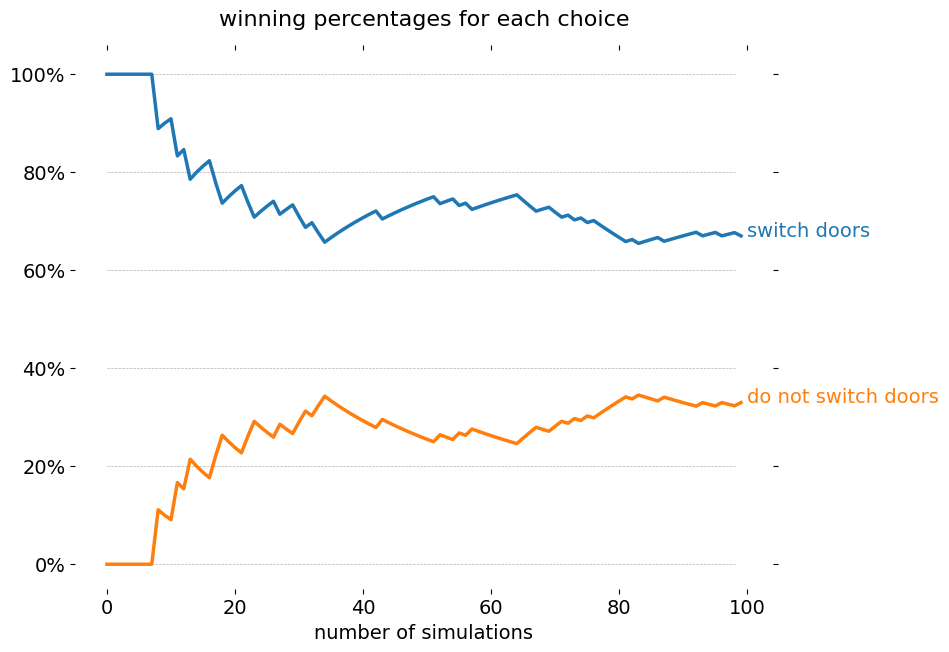

In [60]:
import importlib
fig = chart_format.format_line_chart(df,title = "winning percentages for each choice")

In [61]:
fig.savefig('images\winning_pct.png', bbox_inches='tight')

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
/var/folders/hx/7vffn02n0t3dzkh46qyw1xjh0000gn/T/ipykernel_22760/939170441.py:1: SyntaxWarning: invalid escape sequence '\w'
  fig.savefig('images\winning_pct.png', bbox_inches='tight')


# C4 Data Science & Machine Learning Semester 2 Continuous Assessment 1

To explore a new perspective on the Monty Hall problem, I simulate a variation where the number of doors is increased. This change substantially alters the dataset and requires adjustments to the algorithm. Increasing the number of doors should theoretically amplify the advantage of switching, based on the principles underlying the Monty Hall problem. I also introduce a parameter to adjust the number of doors in our simulation, allowing us to observe how changing this parameter affects the contestant's chances of winning by switching or staying.

### Step 1: Adjusting the Simulation to Include More Doors
Modify the original Monty Hall function to account for a variable number of doors. This requires changes in how the winning door and the contestant's selected door are determined, as well as how Monty chooses a door to open.

In [1]:
import numpy as np

def monty_hall_var(doors=3):
    winning_door = np.random.randint(0, doors)
    selected_door = np.random.randint(0, doors)
    remaining_doors = list(range(doors))
   
    if selected_door == winning_door:
        
        remaining_doors.remove(selected_door)
        remaining_doors.remove(np.random.choice(remaining_doors))
    else:
       
        remaining_doors = [winning_door]
    
    switching_door = remaining_doors[0] if remaining_doors[0] != selected_door else remaining_doors[-1]
  
    switch_win = 1 if switching_door == winning_door else 0
    stay_win = 1 if selected_door == winning_door else 0
    
    return switch_win, stay_win


### Step 2: Simulating with Different Numbers of Doors
Run simulations with an increasing number of doors and compare the outcomes. This exploration will demonstrate how the probability of winning changes as move away from the classic 3-door scenario.

In [2]:
def simulate_monty_hall_var(simulations, doors):
    results = {"doors": doors, "switch_win": 0, "stay_win": 0}
    
    for _ in range(simulations):
        switch_win, stay_win = monty_hall_var(doors=doors)
        results["switch_win"] += switch_win
        results["stay_win"] += stay_win
    
    results["switch_win_pct"] = results["switch_win"] / simulations
    results["stay_win_pct"] = results["stay_win"] / simulations
    
    return results

### Step 3: Running Simulations and Collecting Data
Simulate the game 1,000 times for scenarios with 3, 4, 5, and 10 doors to observe how the probabilities change.

In [3]:
simulation_results = []
door_counts = [3, 4, 5, 10]

for doors in door_counts:
    result = simulate_monty_hall_var(1000, doors)
    simulation_results.append(result)

print("Simulation results for varying numbers of doors:")
for result in simulation_results:
    print(f"{result['doors']} doors - Switch Win %: {result['switch_win_pct']*100:.2f}, Stay Win %: {result['stay_win_pct']*100:.2f}")

Simulation results for varying numbers of doors:
3 doors - Switch Win %: 68.00, Stay Win %: 32.00
4 doors - Switch Win %: 75.90, Stay Win %: 24.10
5 doors - Switch Win %: 77.50, Stay Win %: 22.50
10 doors - Switch Win %: 88.80, Stay Win %: 11.20


### Conclusion

As we increase the number of doors in the Monty Hall problem, the advantage of switching over staying becomes more pronounced. For instance, in the classic problem with three doors, the probability of winning by switching is commonly known to be 2/3. However, as we add more doors, the probability of winning by staying remains at 1/number_of_doors, while the probability of winning by switching becomes significantly higher. The reason behind this is that Monty's action of opening a goat door or doors (if we adjust the problem to have Monty open more than one non-prize door in scenarios with more doors) provides more information to the contestant.
